In [46]:
import numpy as np
import pandas as pd


In [47]:
dd = pd.read_csv('Dataset.csv')
dm = pd.read_csv('Movie_Id_Titles.csv')

In [48]:
data = pd.merge(dd,dm , on = 'item_id')

In [49]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [50]:
data.info

<bound method DataFrame.info of         user_id  item_id  rating  timestamp  \
0             0       50       5  881250949   
1           290       50       5  880473582   
2            79       50       4  891271545   
3             2       50       5  888552084   
4             8       50       5  879362124   
...         ...      ...     ...        ...   
99998       840     1674       4  891211682   
99999       655     1640       3  888474646   
100000      655     1637       3  888984255   
100001      655     1630       3  887428735   
100002      655     1641       3  887427810   

                                                    title  
0                                        Star Wars (1977)  
1                                        Star Wars (1977)  
2                                        Star Wars (1977)  
3                                        Star Wars (1977)  
4                                        Star Wars (1977)  
...                                        

In [51]:
pip install scikit-surprise


In [52]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy


In [54]:
reader = Reader(rating_scale=(1, 5))
datas = Dataset.load_from_df(data[['user_id', 'title', 'rating']], reader)


In [55]:
trainset, testset = train_test_split(datas, test_size=0.2, random_state=42)


In [56]:
model = KNNBasic(sim_options={'user_based': True})
model.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [57]:
predictions = model.test(testset)


In [58]:
accuracy.rmse(predictions)


RMSE: 0.9748


0.9747745538644599

In [61]:
user_id = 5 # Replace with the desired user ID
top_n = 10  # Number of top recommendations

# Extract the top N recommendations for the user
user_predictions = [pred for pred in predictions if pred.uid == str(user_id)]
user_predictions.sort(key=lambda x: x.est, reverse=True)
top_user_predictions = user_predictions[:top_n]

# Print the recommendations
print(f"\nTop {top_n} Recommendations for User {user_id}:")
for pred in top_user_predictions:
    print(f'Movie ID: {pred.iid}, Predicted Rating: {pred.est}')


Top 10 Recommendations for User 5:


In [62]:
print(data.describe())


             user_id        item_id         rating     timestamp
count  100003.000000  100003.000000  100003.000000  1.000030e+05
mean      462.470876     425.520914       3.529864  8.835288e+08
std       266.622454     330.797791       1.125704  5.343791e+06
min         0.000000       1.000000       1.000000  8.747247e+08
25%       254.000000     175.000000       3.000000  8.794487e+08
50%       447.000000     322.000000       4.000000  8.828269e+08
75%       682.000000     631.000000       4.000000  8.882600e+08
max       943.000000    1682.000000       5.000000  8.932866e+08


In [63]:
user_ratings = data[data['user_id'] == user_id]
print(f"\nUser {user_id} Ratings:")
print(user_ratings)



User 5 Ratings:
       user_id  item_id  rating  timestamp                            title
150          5       50       4  875635758                 Star Wars (1977)
695          5      172       5  875636130  Empire Strikes Back, The (1980)
1539         5      377       1  878844615              Heavyweights (1994)
2299         5      451       1  875636571                    Grease (1978)
2647         5      257       5  875635239              Men in Black (1997)
...        ...      ...     ...        ...                              ...
97764        5      388       2  879198898     Beverly Hills Cop III (1994)
98663        5      442       1  879198898     Amityville Curse, The (1990)
98722        5      400       1  878844630       Little Rascals, The (1994)
99500        5      438       1  878844423            Amityville 3-D (1983)
99519        5      446       4  875720845           Burnt Offerings (1976)

[175 rows x 5 columns]


In [64]:
# Print all predictions for the user
print(f"\nAll Predictions for User {user_id}:")
for pred in user_predictions:
    print(f'Movie ID: {pred.iid}, Predicted Rating: {pred.est}')



All Predictions for User 5:


In [69]:
# Print all predictions
all_predictions = [(uid, iid, true_r, est) for uid, iid, true_r, est, _ in predictions]

# Sort all predictions by predicted rating in descending order
all_predictions.sort(key=lambda x: x[3], reverse=True)

# Print the top 10 predictions
top_n_predictions = all_predictions[:10]
print("\nTop 10 Predictions:")
for uid, iid, true_r, est in top_n_predictions:
    print(f'User ID: {uid}, Movie ID: {iid}, True Rating: {true_r}, Predicted Rating: {est}')



Top 10 Predictions:
User ID: 13, Movie ID: Year of the Horse (1997), True Rating: 2.0, Predicted Rating: 5
User ID: 234, Movie ID: Golden Earrings (1947), True Rating: 3.0, Predicted Rating: 5
User ID: 201, Movie ID: Anna (1996), True Rating: 4.0, Predicted Rating: 5
User ID: 181, Movie ID: Year of the Horse (1997), True Rating: 1.0, Predicted Rating: 5
User ID: 279, Movie ID: Santa with Muscles (1996), True Rating: 5.0, Predicted Rating: 5
User ID: 181, Movie ID: The Deadly Cure (1996), True Rating: 1.0, Predicted Rating: 5
User ID: 840, Movie ID: Year of the Horse (1997), True Rating: 5.0, Predicted Rating: 5
User ID: 257, Movie ID: Visitors, The (Visiteurs, Les) (1993), True Rating: 2.0, Predicted Rating: 5
User ID: 448, Movie ID: Year of the Horse (1997), True Rating: 4.0, Predicted Rating: 4.999999999999999
User ID: 451, Movie ID: Year of the Horse (1997), True Rating: 1.0, Predicted Rating: 4.999999999999999


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from spacy import displacy
from sklearn.metrics.pairwise import linear_kernel

In [71]:
# get rating count
data_rating = dict(data['rating'].value_counts())
data_rating

{4: 34174, 3: 27145, 5: 21203, 2: 11370, 1: 6111}

<Axes: title={'center': 'Rating Count'}>

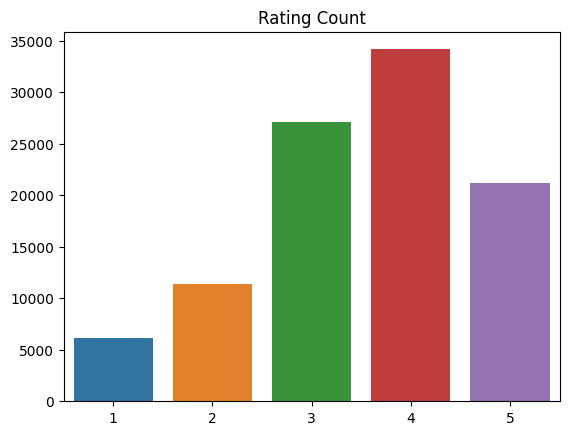

In [72]:
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))

<Axes: title={'center': 'Top 15 Movies'}>

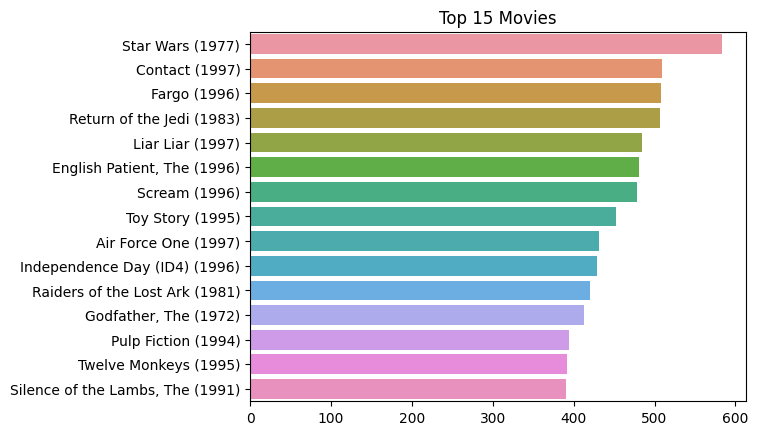

In [77]:
average_rating = dict()
count_rating = dict()
for title in data['title'].unique():
  average_rating[title] = data[data['title'] == title]['rating'].mean()
  count_rating[title]  = data[data['title'] == title]['rating'].count()
tmp_average = np.zeros((data.shape[0]))
tmp_count  = np.zeros((data.shape[0]))
for idx in range(data.shape[0]):
  tmp_average[idx]  = average_rating[data['title'][idx]]
  tmp_count[idx] = count_rating[data['title'][idx]]
data['average_rating'] = tmp_average
data['count_rating'] = tmp_count
data.head(2)
C = data['average_rating'].mean()
M = data['count_rating'].quantile(0.90)
Q_movies = data.copy().loc[data['count_rating'] >=M] # place qualified data beacuse we want top of them
Q_movies.shape
def weighted_rating(x, M=M, C=C):
    v = x['count_rating']
    R = x['average_rating']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)
Q_movies['score'] = Q_movies.apply(weighted_rating , axis = 1)
Q_movies = Q_movies.sort_values('score' , ascending = False)
Q_movies['title'].unique()[:15]
tmp_d = Q_movies['title'].value_counts()
plt.title('Top 15 Movies')
sns.barplot(y=tmp_d.keys()[:15], x=tmp_d.values[:15])

<Axes: title={'center': 'Count Movies'}>

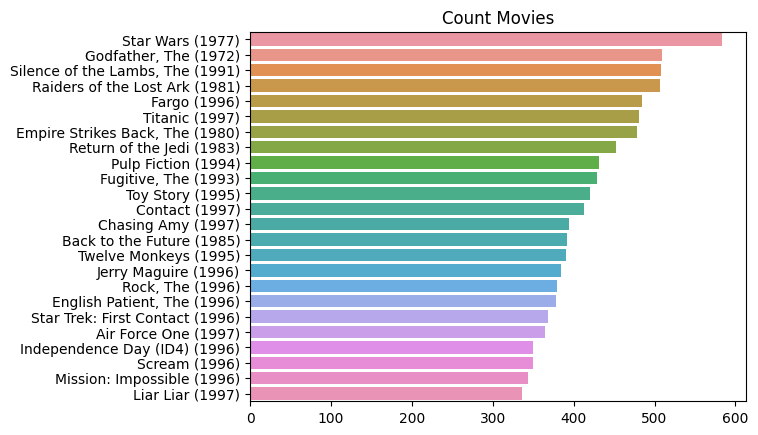

In [78]:
plt.title('Count Movies')
sns.barplot(y = list(Q_movies['title'].unique()) , x = list(Q_movies['title'].value_counts()))